In [1]:
import os
os.chdir('../')

In [9]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics.cluster import _supervised
from scipy.optimize import linear_sum_assignment
import numpy as np
import matplotlib.pyplot as plt
from metrics_cluster import spectral_clustering_metrics
import pandas as pd

In [14]:
path = './transfer/unsup/mnist_5class+simple/samples200epochs3000_eps0.5_netlr0.01_netsteps1_pisteps1_piinitidentity_pigam0.5_pitau0.01_pisymFalse/csv/acc_sc.csv'

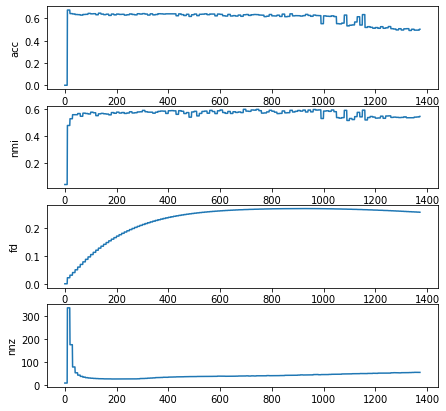

In [24]:
df = pd.read_csv(os.path.join(path))
fig, ax = plt.subplots(nrows=4, figsize=(7, 7))
for c, col in enumerate(['acc', 'nmi', 'fd', 'nnz']):
    ax[c].plot(df['epoch'], df[col])
    ax[c].set_ylabel(col)

In [43]:
path = './transfer/unsup/mnist_5class+simple/samples200epochs300_eps0.1_netlr0.1_netsteps1_pisteps1_piinituniform_pigam0.1_pitau0.1/membership/epoch35.npy'

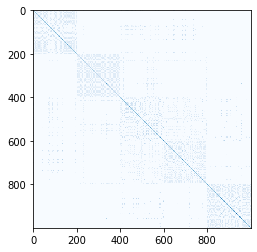

In [44]:
Pi = np.load(path)
plt.imshow(Pi, cmap='Blues')

In [45]:
import scipy.sparse
lap = scipy.sparse.csgraph.laplacian(Pi, normed=True)
# spectral_clustering_metrics()

In [46]:
eig_vals, eig_vecs = np.linalg.eig(lap)

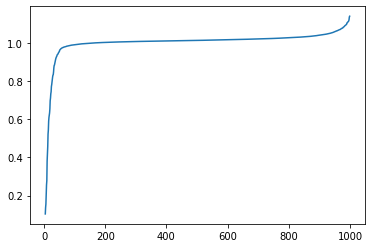

In [47]:
plt.plot(np.where(np.sort(eig_vals)[::] < 1e-1, np.nan, np.sort(eig_vals)[::]))

In [48]:
(np.sort(eig_vals)[::-1] < 1e-2).sum()

2

In [58]:
X = np.array([[1, 1], [2, 1], [1, 0],
              [4, 7], [3, 5], [3, 6]])
SpectralClustering(2).fit(X)._cluster_labels_

AttributeError: 'SpectralClustering' object has no attribute '_cluster_labels_'

In [63]:
cov = X @ X.T / X.shape[0]
# spectral_clustering_metrics(cov, 2, [1, 1, 1, 0, 0, 0])
spectral_clustering_metrics

<function metrics_cluster.spectral_clustering_metrics(A, nclass, label, verbose=True, n_init=10, normalize_embed=True, solver_type='lm', extra_dim=0, tol=0)>